
A Confirmation that all columns and cells are completely filled,there are no empty cells and data is in exact type :

feature_name          numbe_of_missing_values
LSOAcode2011                                             0
LSOAname                                                 0
YearendingDec1995                                        0
YearendingDec1996                                        0
YearendingDec1997                                        0
YearendingDec1998                                        0
YearendingDec1999                                        0
YearendingDec2000                                        0
YearendingDec2001                                        0
YearendingDec2002                                        0
YearendingDec2003                                        0
YearendingDec2004                                        0
YearendingDec2005                                        0
YearendingDec2006                                        0
Yearendin

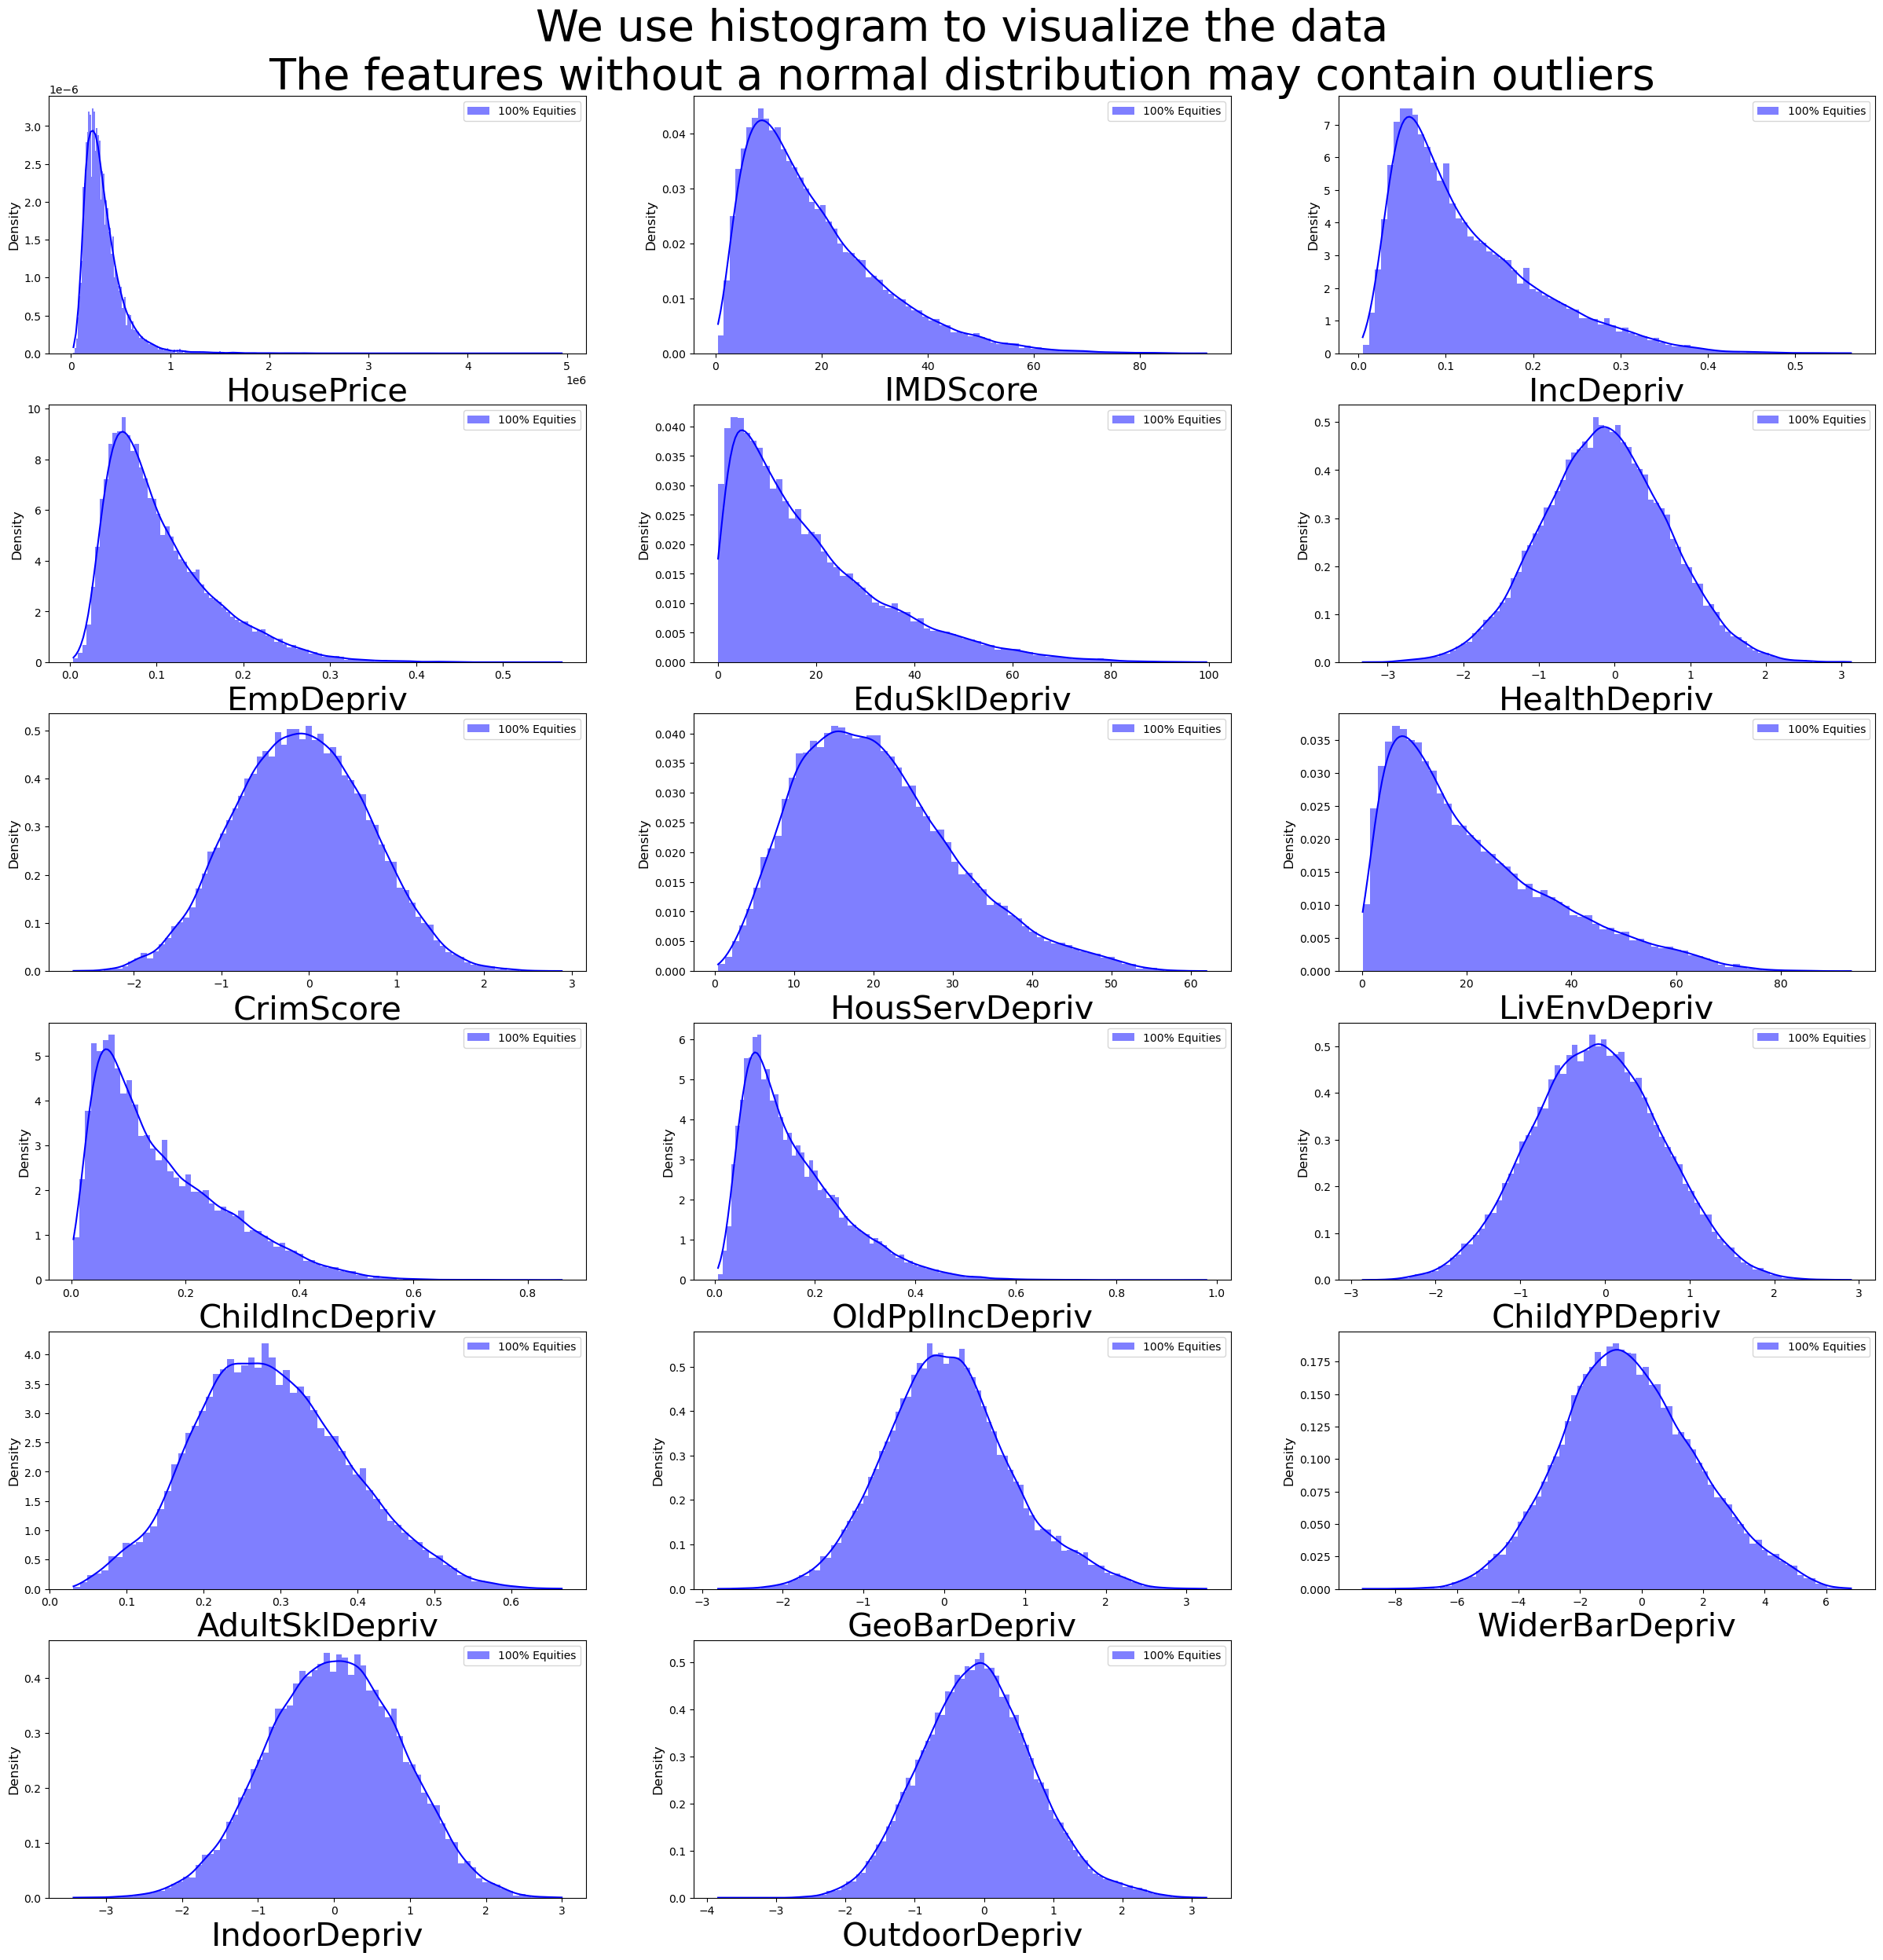

<Figure size 640x480 with 0 Axes>

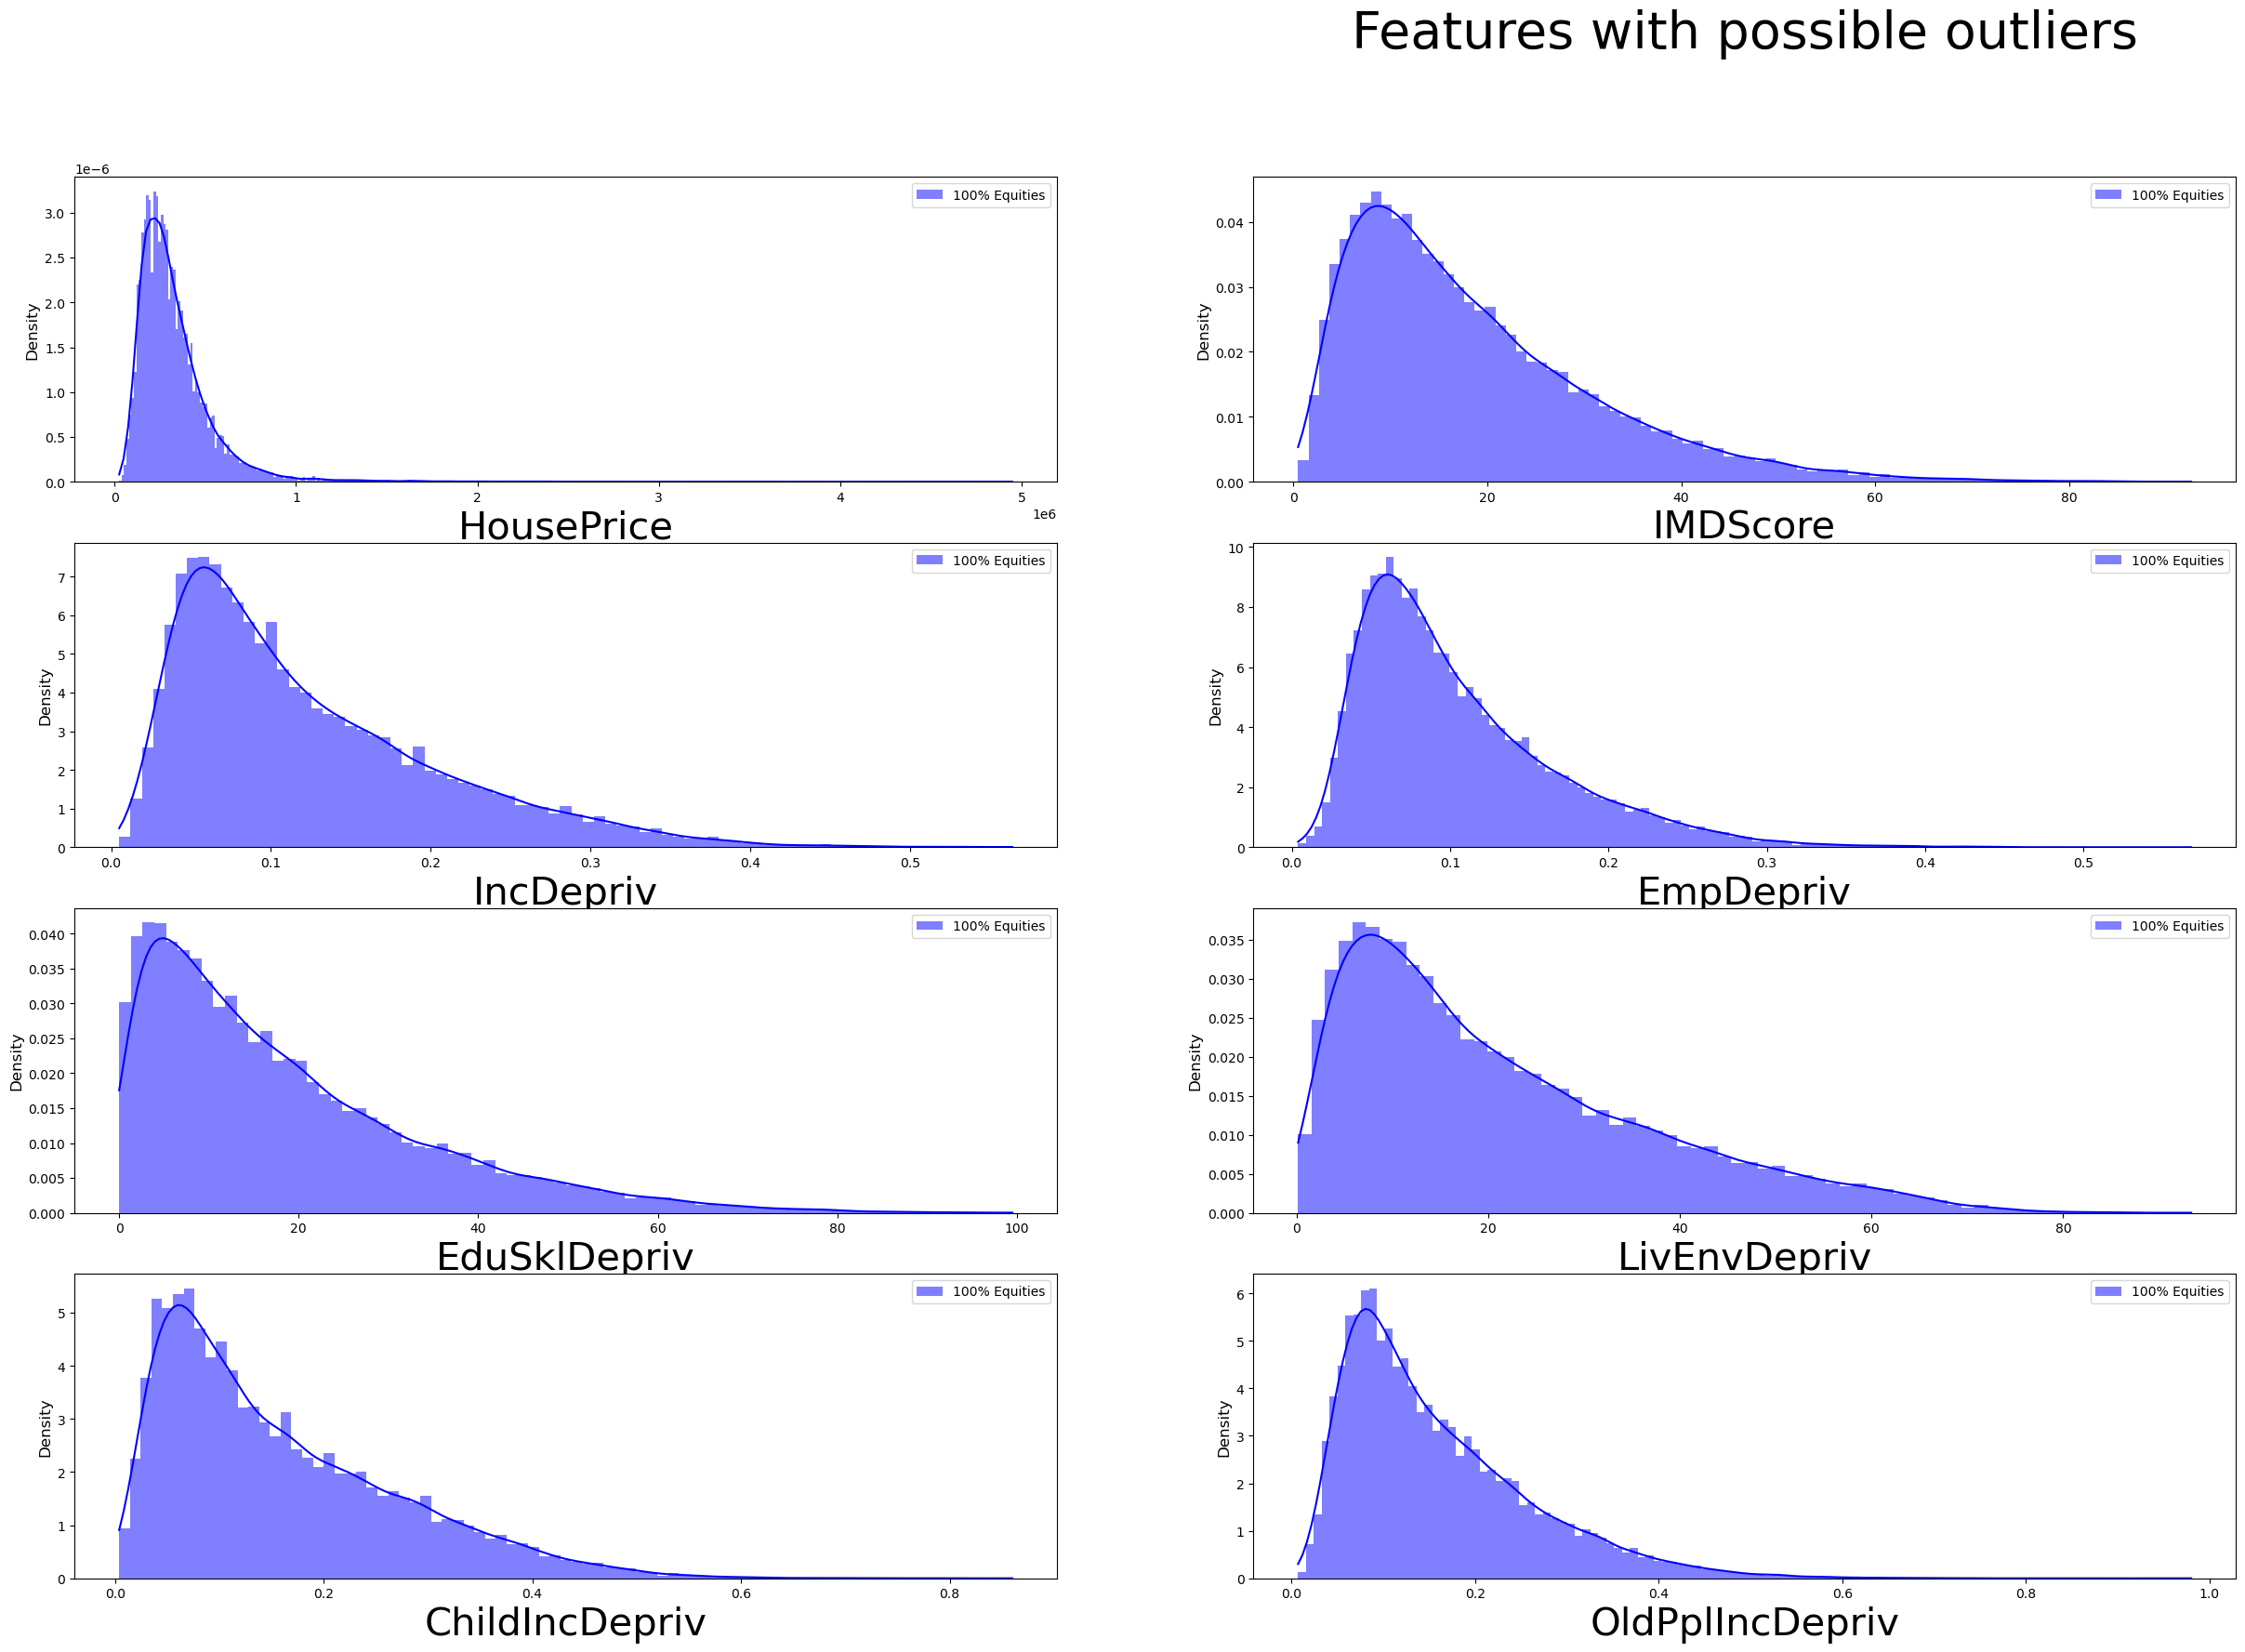

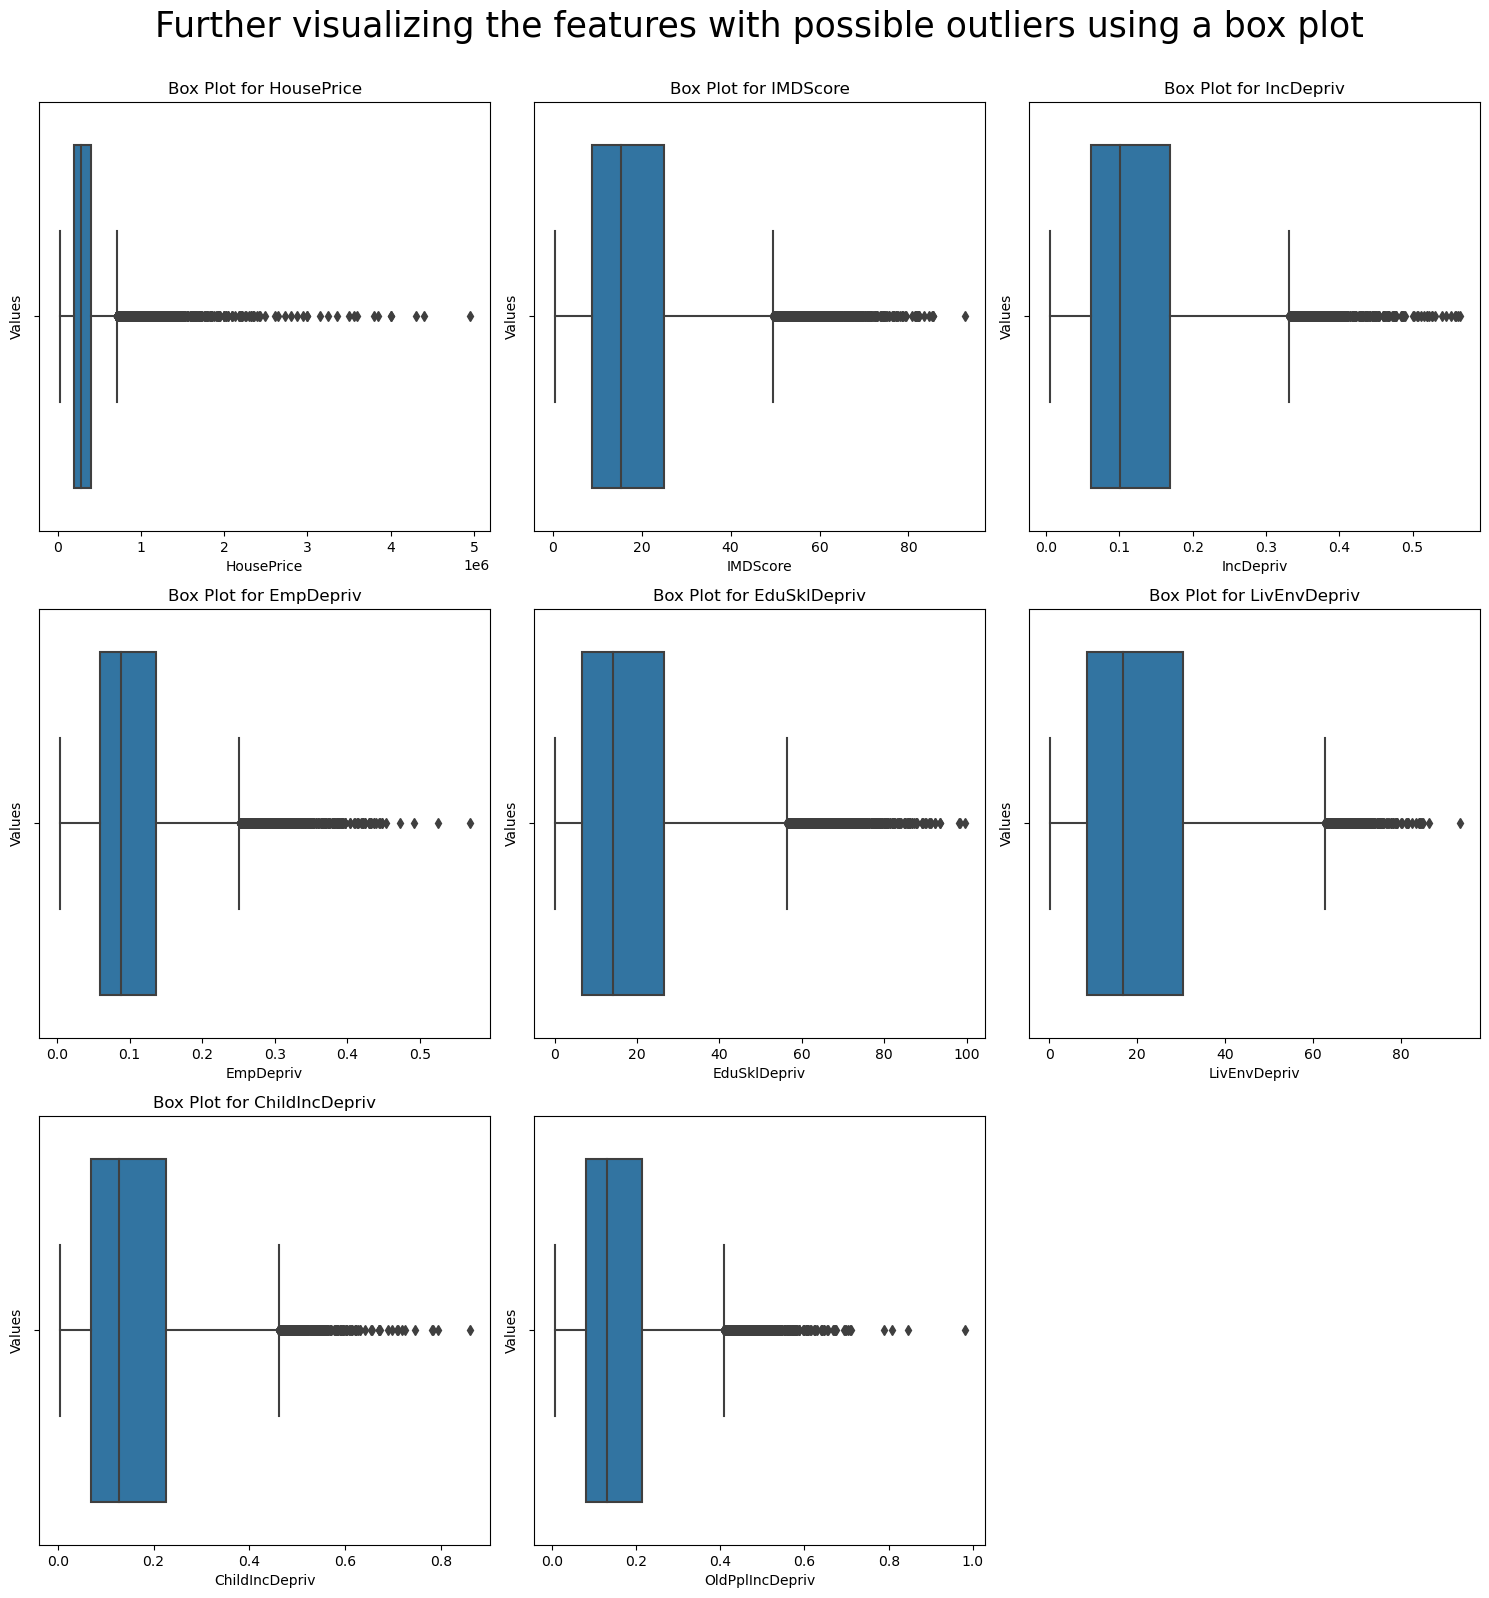

Column: HousePrice
Upper limit: 1006647.8850594109
Lower limit: -345726.3194057309
Before removing outliers: 28003
After removing outliers: 27600
Outliers: 403


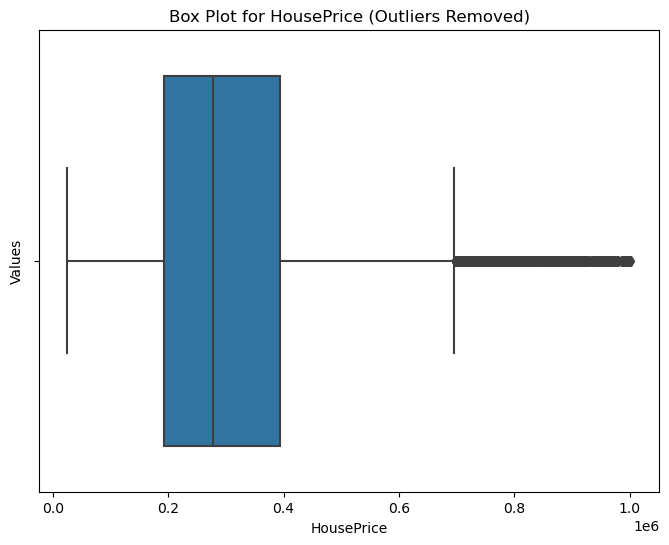

Column: IMDScore
Upper limit: 56.974926458489236
Lower limit: -19.765851603416774
Before removing outliers: 27600
After removing outliers: 27251
Outliers: 349


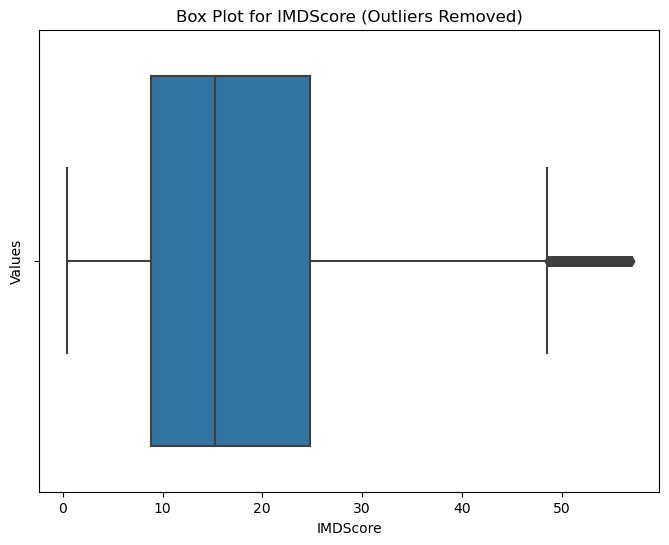

Column: IncDepriv
Upper limit: 0.35176415148382156
Lower limit: -0.10884521272928041
Before removing outliers: 27251
After removing outliers: 27101
Outliers: 150


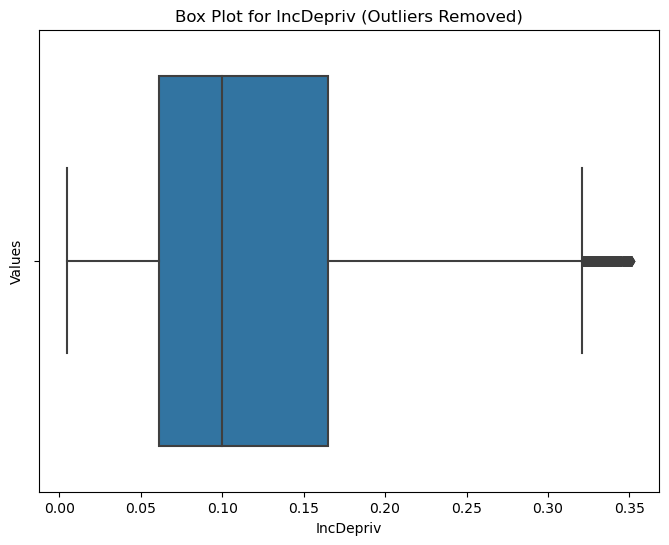

Column: EmpDepriv
Upper limit: 0.27096451309042785
Lower limit: -0.06669529793231564
Before removing outliers: 27101
After removing outliers: 26907
Outliers: 194


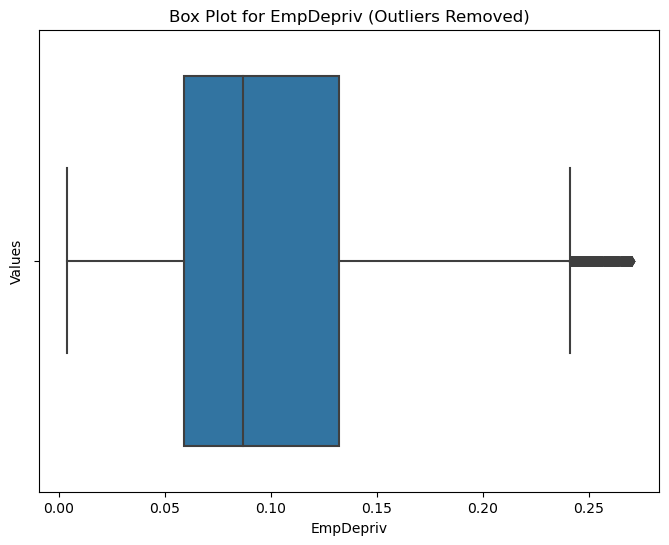

Column: EduSklDepriv
Upper limit: 61.178200385351886
Lower limit: -25.531303667025806
Before removing outliers: 26907
After removing outliers: 26603
Outliers: 304


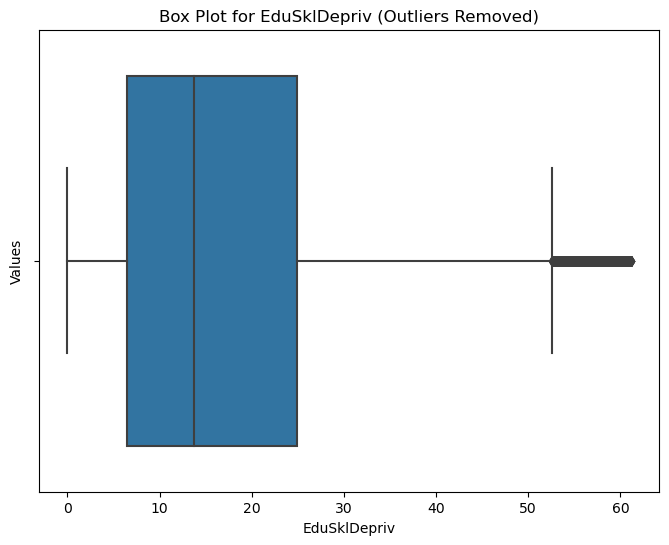

Column: LivEnvDepriv
Upper limit: 66.61683088671376
Lower limit: -25.423668461423368
Before removing outliers: 26603
After removing outliers: 26456
Outliers: 147


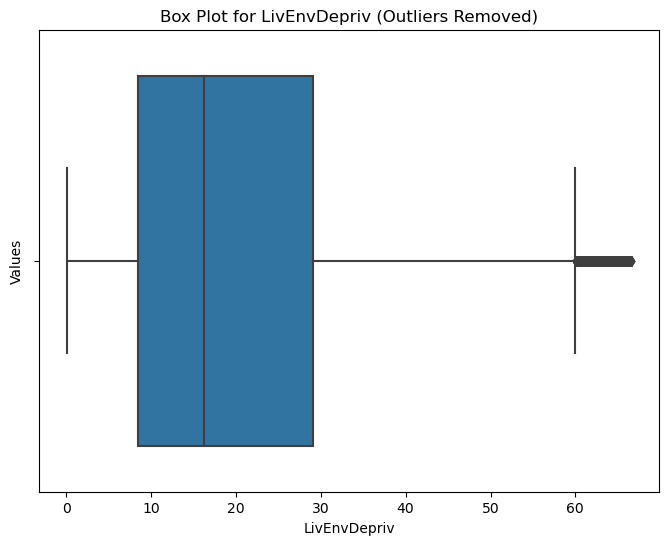

Column: ChildIncDepriv
Upper limit: 0.4548345690215554
Lower limit: -0.15563196847725544
Before removing outliers: 26456
After removing outliers: 26324
Outliers: 132


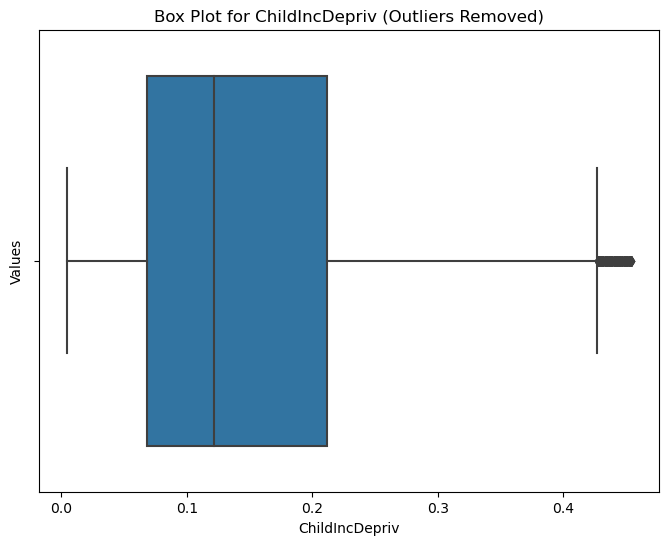

Column: OldPplIncDepriv
Upper limit: 0.4277679637086043
Lower limit: -0.12645699273154914
Before removing outliers: 26324
After removing outliers: 26014
Outliers: 310


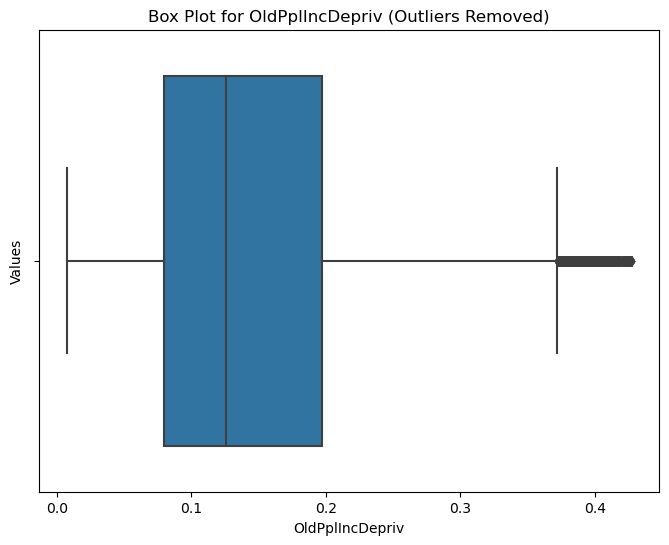

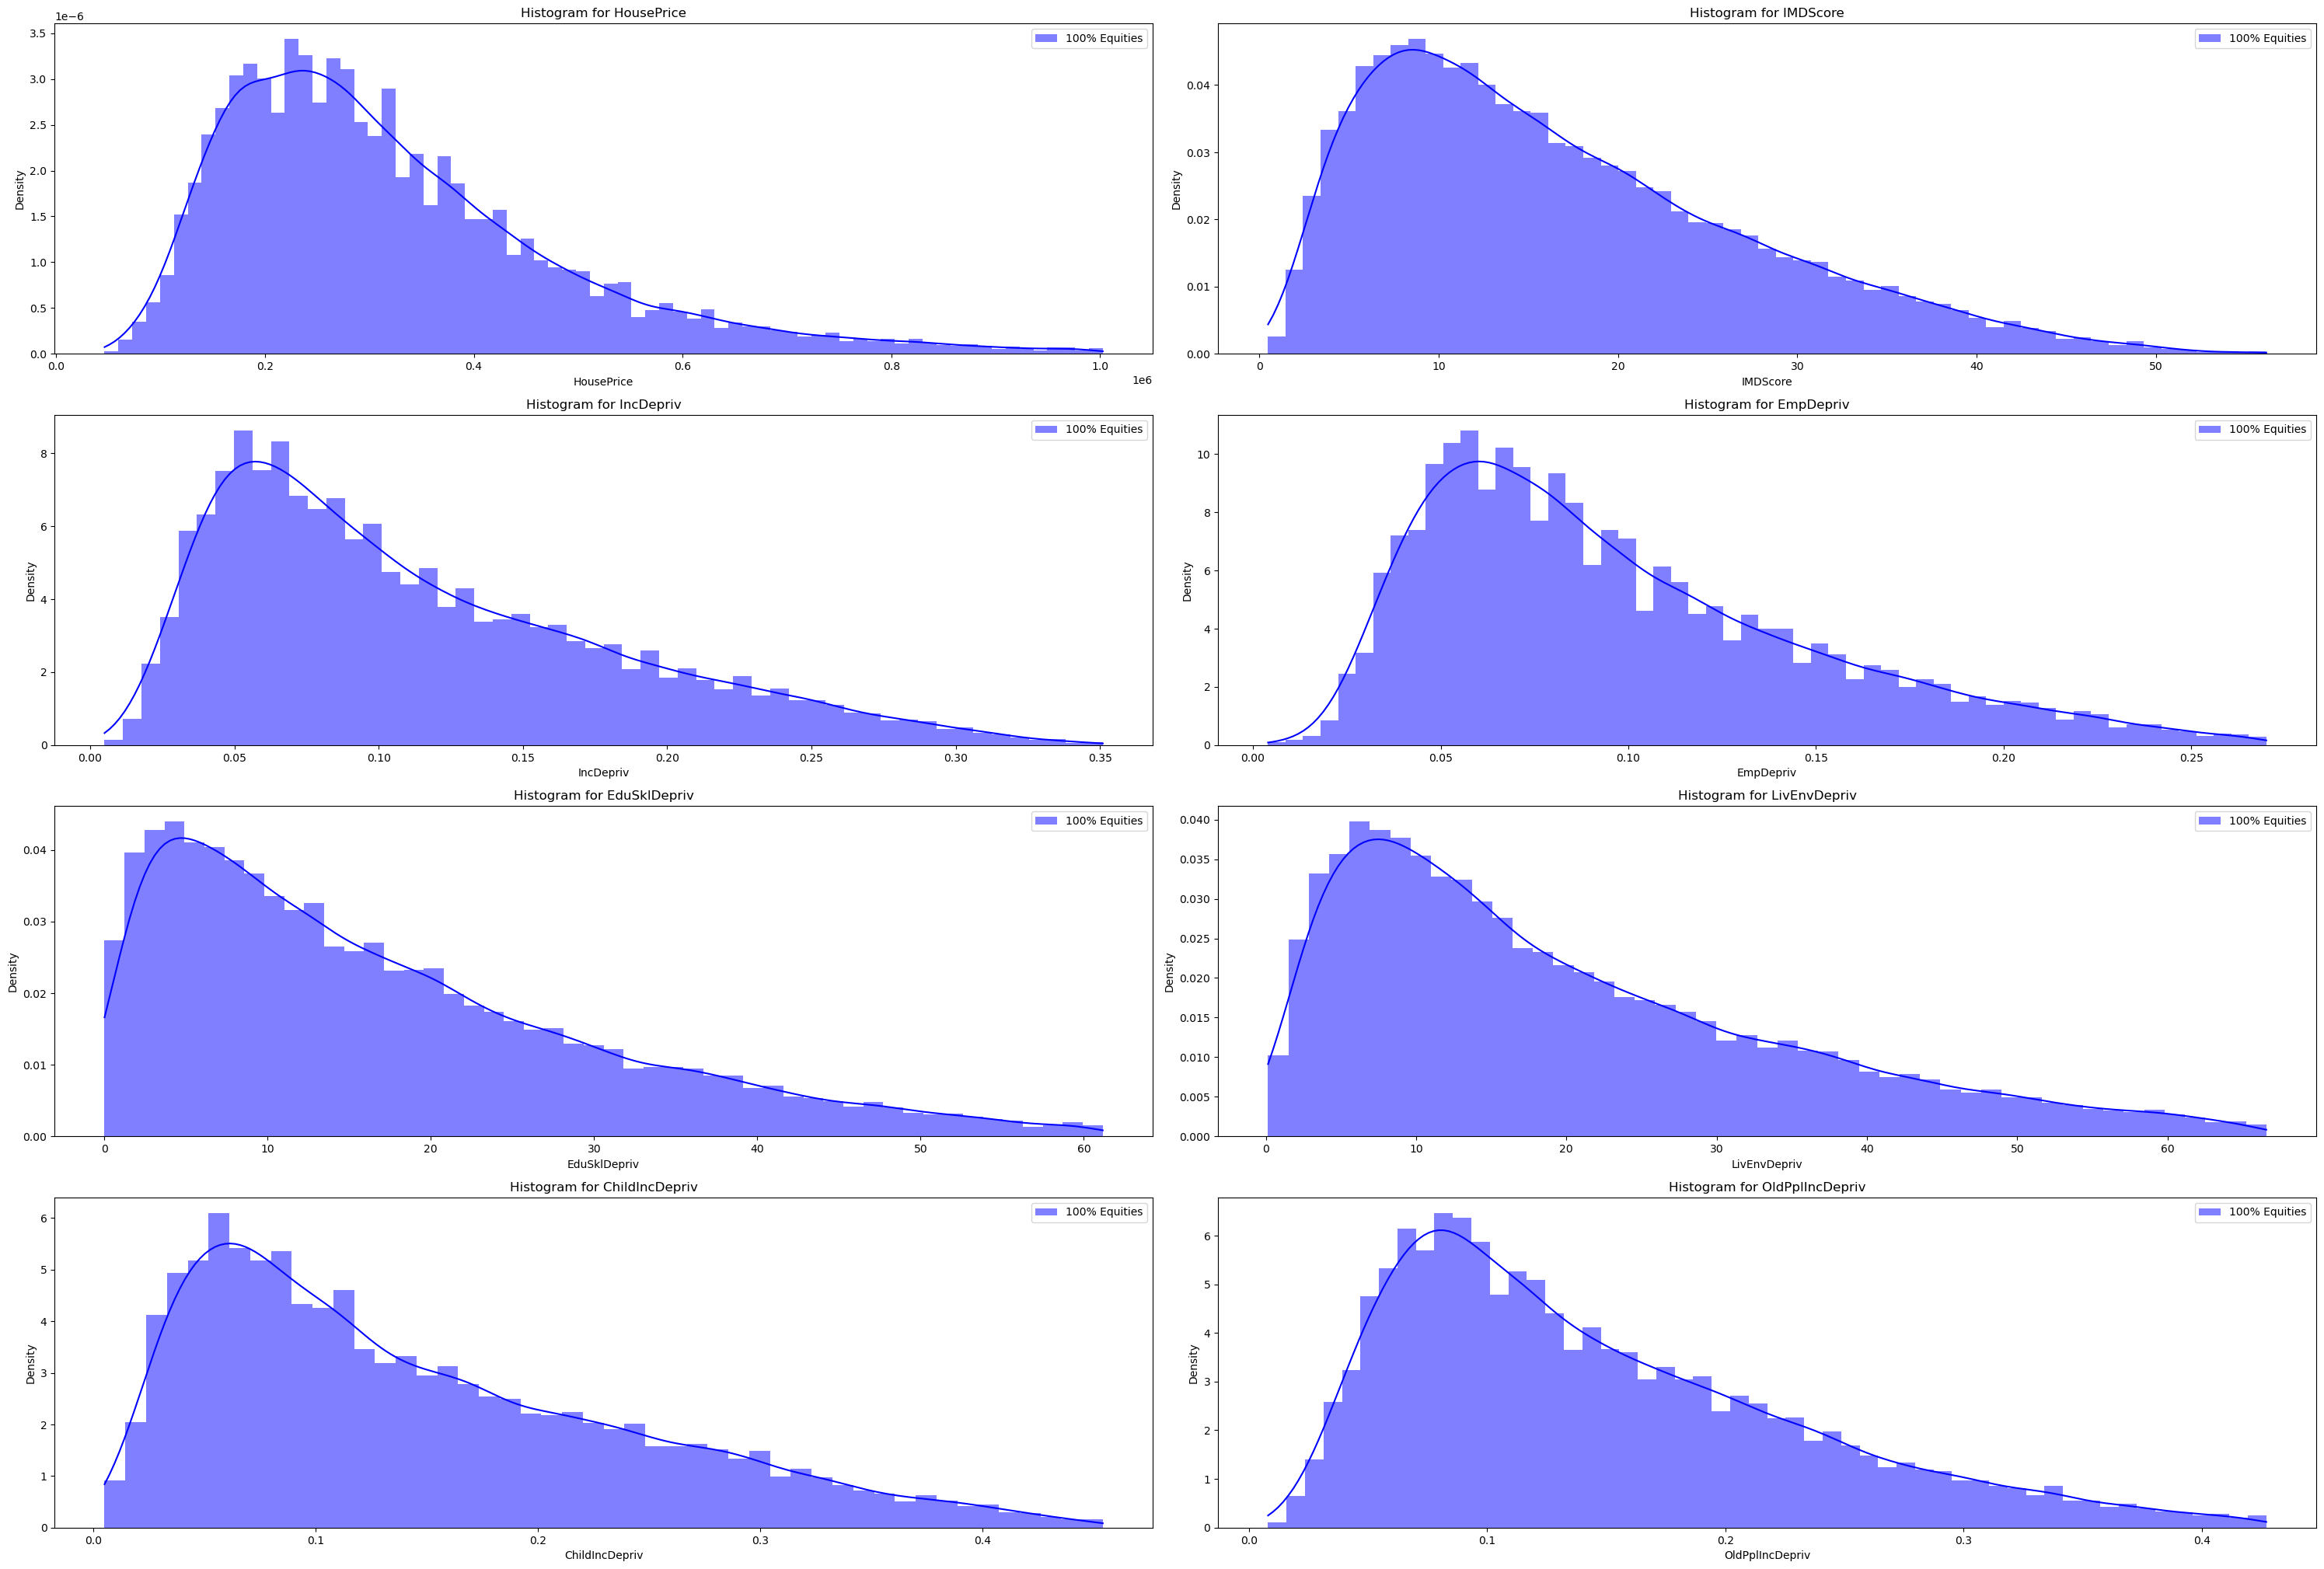

finished preprocessing.....


In [2]:
#Run preprocessing Notebook
#To see the sets in preprocessing please view preprocessing notebook
%run HPP_Preprocessing.ipynb
#The variables we would use from this notebook are featuresNormalized (contains all features normalized) & dfp (normalized dataframe)

In [3]:
#we make use of only normalize columns thats why you see we use the _n only
#These are the independent features
independent_columns = ['IMDScore_n', 'IncDepriv_n', 'EmpDepriv_n', 'EduSklDepriv_n', 'HealthDepriv_n', 'CrimScore_n', 'HousServDepriv_n', 'LivEnvDepriv_n', 'ChildIncDepriv_n', 'OldPplIncDepriv_n', 'ChildYPDepriv_n', 'AdultSklDepriv_n', 'GeoBarDepriv_n', 'WiderBarDepriv_n', 'IndoorDepriv_n', 'OutdoorDepriv_n']
# House price is target column
target_column = 'HousePrice_n'

X = dfp[independent_columns]  # Features
y = dfp[target_column]  # Target variable


from sklearn.model_selection import train_test_split
# Split data into 80% training and 20% testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


from sklearn.tree import DecisionTreeRegressor
# Create the regressor
regressor = DecisionTreeRegressor(random_state=42)
#max_leaf_nodes=50
# Train the model on the training data
regressor.fit(X_train, y_train)

# Predict using the trained model on the test data
y_pred = regressor.predict(X_test)





In [4]:
from sklearn.metrics import mean_squared_error, r2_score

# Calculate Mean Squared Error
mse = mean_squared_error(y_test, y_pred)

# Calculate R-squared
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-squared:", r2)


Mean Squared Error: 0.017463833113445095
R-squared: 0.4166890003876166


In [5]:
# Get the feature importance scores
feature_importance = regressor.feature_importances_

# Create a DataFrame to display the results
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importance})

# Sort the DataFrame in descending order of importance
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Display the feature importance
print(feature_importance_df)


              Feature  Importance
4      HealthDepriv_n    0.367681
15    OutdoorDepriv_n    0.130940
11   AdultSklDepriv_n    0.119146
13   WiderBarDepriv_n    0.089360
10    ChildYPDepriv_n    0.039384
14     IndoorDepriv_n    0.032968
3      EduSklDepriv_n    0.031304
6    HousServDepriv_n    0.030633
5         CrimScore_n    0.026370
7      LivEnvDepriv_n    0.024456
12     GeoBarDepriv_n    0.022210
9   OldPplIncDepriv_n    0.020945
8    ChildIncDepriv_n    0.017909
2         EmpDepriv_n    0.017855
0          IMDScore_n    0.015279
1         IncDepriv_n    0.013558
